# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from datetime import date
from datetime import datetime
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

In [4]:
# Create a list
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [5]:
print("Beginning Data Retrieval ")
print("-----------------------------")

# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-------------------------------")
print("Data Retrieval Complete")
print("--------------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : esperance
Processing Record 2 of Set 1 : albany
Processing Record 3 of Set 1 : muros
Processing Record 4 of Set 1 : thompson
Processing Record 5 of Set 1 : hilo
Processing Record 6 of Set 1 : port lincoln
Processing Record 7 of Set 1 : ushuaia
Processing Record 8 of Set 1 : bethel
Processing Record 9 of Set 1 : coquimbo
Processing Record 10 of Set 1 : vaini
Processing Record 11 of Set 1 : dikson
Processing Record 12 of Set 1 : kollegal
Processing Record 13 of Set 1 : bredasdorp
Processing Record 14 of Set 1 : bambanglipuro
Processing Record 15 of Set 1 : kapaa
Processing Record 16 of Set 1 : dwarka
Processing Record 17 of Set 1 : souillac
Processing Record 18 of Set 1 : puerto ayora
Processing Record 19 of Set 1 : karatuzskoye
Processing Record 20 of Set 1 : xiaoweizhai
Processing Record 21 of Set 1 : bluff
City not found. Skipping...
Processing Record 22 of Set 1 : khatanga
City not found. Skipping.

Processing Record 37 of Set 4 : mbaiki
Processing Record 38 of Set 4 : torbay
City not found. Skipping...
Processing Record 39 of Set 4 : nome
Processing Record 40 of Set 4 : husavik
City not found. Skipping...
Processing Record 41 of Set 4 : agua blanca sur
Processing Record 42 of Set 4 : shenzhen
Processing Record 43 of Set 4 : mayo
Processing Record 44 of Set 4 : tazovskiy
Processing Record 45 of Set 4 : berlevag
City not found. Skipping...
Processing Record 46 of Set 4 : hamilton
City not found. Skipping...
Processing Record 47 of Set 4 : isangel
Processing Record 48 of Set 4 : pathein
Processing Record 49 of Set 4 : ancud
City not found. Skipping...
Processing Record 50 of Set 4 : mopipi
Processing Record 0 of Set 5 : plettenberg bay
Processing Record 1 of Set 5 : hasaki
Processing Record 2 of Set 5 : aswan
Processing Record 3 of Set 5 : carnduff
Processing Record 4 of Set 5 : ketchikan
Processing Record 5 of Set 5 : frontera
Processing Record 6 of Set 5 : saint anthony
Processing

Processing Record 23 of Set 8 : valera
Processing Record 24 of Set 8 : batagay
Processing Record 25 of Set 8 : savannah bight
Processing Record 26 of Set 8 : manutuke
Processing Record 27 of Set 8 : nuevo progreso
Processing Record 28 of Set 8 : broome
Processing Record 29 of Set 8 : caravelas
City not found. Skipping...
Processing Record 30 of Set 8 : karratha
City not found. Skipping...
Processing Record 31 of Set 8 : mecca
Processing Record 32 of Set 8 : dekalb
Processing Record 33 of Set 8 : acapulco
Processing Record 34 of Set 8 : aklavik
Processing Record 35 of Set 8 : xuddur
Processing Record 36 of Set 8 : shenjiamen
Processing Record 37 of Set 8 : kungurtug
Processing Record 38 of Set 8 : gigmoto
Processing Record 39 of Set 8 : pindiga
Processing Record 40 of Set 8 : mancio lima
City not found. Skipping...
Processing Record 41 of Set 8 : kumluca
Processing Record 42 of Set 8 : tautira
Processing Record 43 of Set 8 : kultuk
Processing Record 44 of Set 8 : berbera
Processing Reco

Processing Record 3 of Set 12 : kununurra
Processing Record 4 of Set 12 : gamba
Processing Record 5 of Set 12 : borzna
Processing Record 6 of Set 12 : savonlinna
Processing Record 7 of Set 12 : salamiyah
Processing Record 8 of Set 12 : obera
Processing Record 9 of Set 12 : evensk
Processing Record 10 of Set 12 : bintulu
Processing Record 11 of Set 12 : san juan
Processing Record 12 of Set 12 : dingle
Processing Record 13 of Set 12 : indianola
Processing Record 14 of Set 12 : osmena
Processing Record 15 of Set 12 : greytown
Processing Record 16 of Set 12 : hurricane
Processing Record 17 of Set 12 : ratnagiri
-------------------------------
Data Retrieval Complete
--------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create the data frame
weather_data = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [7]:
# Display the Data Frame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Esperance,31,AU,1659929701,63,-33.8667,121.9000,62.67,19.19
1,Albany,0,US,1659929818,88,42.6001,-73.9662,77.41,3.04
2,Muros,3,ES,1659930309,94,42.7762,-9.0603,63.68,4.50
3,Thompson,75,CA,1659930022,88,55.7435,-97.8558,64.56,3.44
4,Hilo,40,US,1659929966,77,19.7297,-155.0900,84.27,5.75


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,578.000000,5.780000e+02,578.000000,578.000000,578.000000,578.000000,578.000000
mean,52.816609,1.659930e+09,73.280277,20.006236,15.014440,69.015934,7.805640
std,39.006167,2.156913e+02,19.029786,33.077842,90.926711,13.354684,5.646475
min,0.000000,1.659930e+09,1.000000,-54.800000,-179.166700,32.900000,0.000000
25%,13.000000,1.659930e+09,61.250000,-7.048050,-68.460875,59.095000,3.440000
50%,53.500000,1.659930e+09,77.000000,22.157300,17.813750,70.700000,6.420000
75%,96.000000,1.659930e+09,88.000000,47.955475,96.932125,79.510000,11.140000
max,100.000000,1.659930e+09,100.000000,78.218600,179.316700,97.430000,36.930000


In [9]:
#  Get the indices of cities that have humidity over 100%.
weather_data.loc[weather_data['Humidity']>100,:]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [11]:
# Save city data into a csv file
weather_data.to_csv("../output_data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

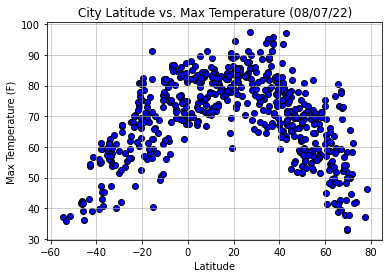

In [12]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], facecolor = "blue", edgecolor = "black")

# Set the title
plt.title("City Latitude vs. Max Temperature (08/07/22)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.6)

# Save the figure
plt.savefig("../output_data/City Latitude vs Max Temperature.png")

The temprerature and latitude both increase until the latitude reaches to 39-40, then the temperature declines as the latitude drops.

## Latitude vs. Humidity Plot

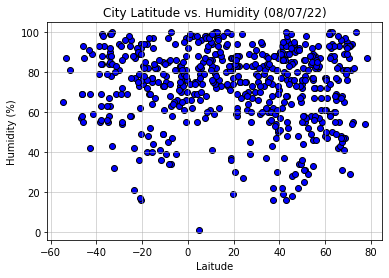

In [13]:
# Create Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (08/07/22)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Humidity.png")

The graph indicates there is not a significant correlation between humidity and latitude.

## Latitude vs. Cloudiness Plot

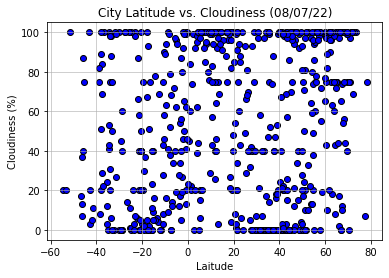

In [14]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (08/07/22)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.6)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Cloudiness.png")

The cloudiness data is widely spread across the latitude, and this shows there is not any correlation between Cloudiness and latitude.


## Latitude vs. Wind Speed Plot

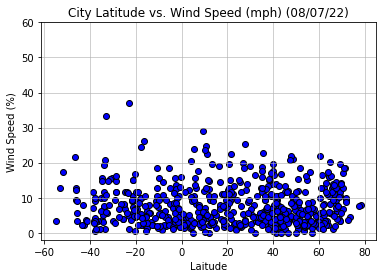

In [15]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], facecolor = "blue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed (mph) (08/07/22)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,60)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.6)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Wind Speed.png")

There is no correlation between wind speed and cities latitude.


## Linear Regression

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]

# Define function to create linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="blue")

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.67


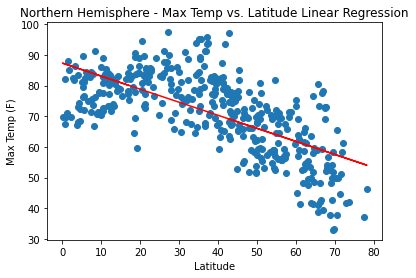

In [17]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a strong negative correlation between latitude and max temperature for northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.76


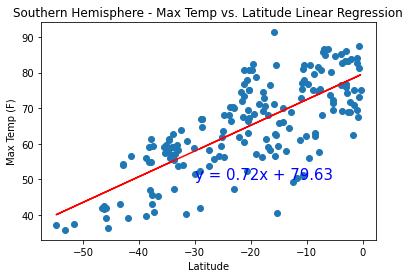

In [18]:
# Set function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Set function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

This reflects a strong positive correlation between latitude and max temperature for southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.15


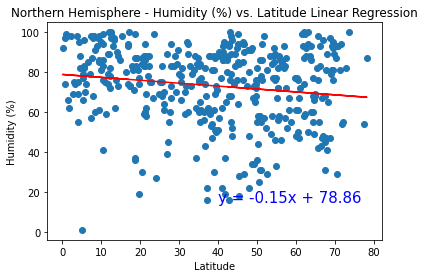

In [19]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There is a moderate negative correlation between latitude and humidity for northern hemisphere.

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The r-squared is : -0.07


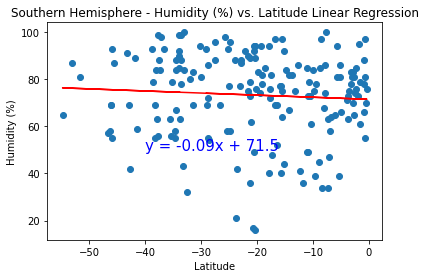

In [20]:
# Set function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Set function #2
annotate(equation, -40, 50)

# Set the title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There is a moderate negative correlation between latitude and humidity for southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.0


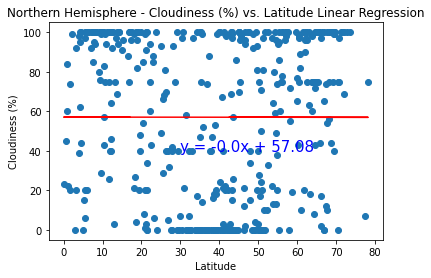

In [21]:
# Set Function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Set Function #2
annotate(equation, 30, 40)

# Set the title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is no correlation between latitude and cloudiness for northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.04


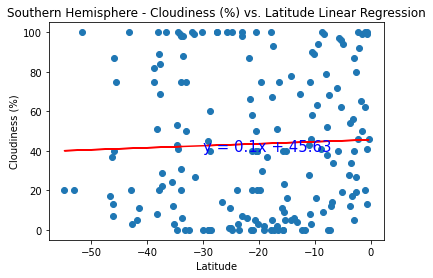

In [22]:
# Set function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Set function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is a weak positive correlation between latitude and cloudiness for Southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.01


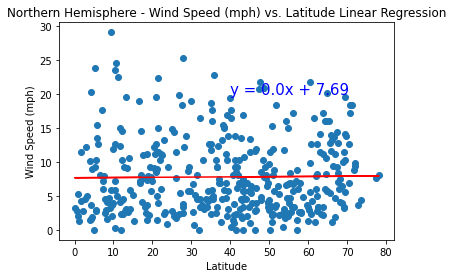

In [23]:
# Set function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Set function #2
annotate(equation, 40, 20)

# Set the title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

There is a moderate positive correlation between latitude and wind speed for Northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.11


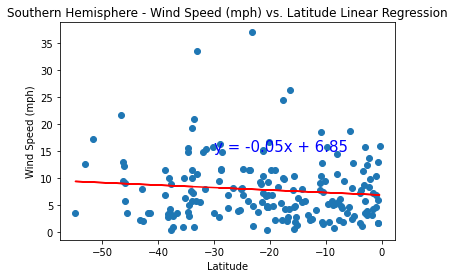

In [24]:
# Set function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Set function #2
annotate(equation, -30, 15)

# Set the title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

There is a moderate negative correlation between latitude and wind speed for southern hemisphere.